In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import get_data
import statsmodels
from simulate import simulatedata

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
syms = ['BTCUSDT']
freq = '10min'
start_date = '2020-01-01'
end_date = '2020-01-03'

In [7]:
raw_data = get_data.get_data(syms, freq, start_date, end_date)
raw_data

BTCUSDT_2019-12-26.json
Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=695704595703-1kpq4gcdb9769asd1vhdo80fssdia4m6.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.
BTCUSDT_2020-01-02.json


c:\Users\admin\Desktop\Binance\Binance\get_data.py:52: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  data[symbol] = _fit_data_to_df(data[symbol], frequency)[start_time:end_time]


{'BTCUSDT':                               open     high      low    close      volume  \
 time                                                                        
 2020-01-01 00:00:00+00:00  7195.24  7196.25  7178.20  7191.07  154.874358   
 2020-01-01 00:10:00+00:00  7193.15  7193.53  7177.35  7178.29   80.261439   
 2020-01-01 00:20:00+00:00  7177.71  7185.56  7175.47  7178.45   96.049725   
 2020-01-01 00:30:00+00:00  7178.19  7185.44  7176.23  7177.53   59.973326   
 2020-01-01 00:40:00+00:00  7177.14  7182.99  7176.34  7182.94   44.872982   
 ...                            ...      ...      ...      ...         ...   
 2020-01-02 23:20:00+00:00  6959.16  6962.39  6950.00  6962.34  217.262815   
 2020-01-02 23:30:00+00:00  6962.47  6974.75  6957.66  6965.37  145.757951   
 2020-01-02 23:40:00+00:00  6965.09  6969.46  6959.87  6967.41   75.157310   
 2020-01-02 23:50:00+00:00  6967.40  6968.82  6961.24  6965.71   82.459841   
 2020-01-03 00:00:00+00:00  6965.49  6965.71  6948.45

In [19]:
dt = pd.DataFrame()
dt['close'] = raw_data['BTCUSDT']['close']
dt['high'] = raw_data['BTCUSDT']['high']
dt['low'] = raw_data['BTCUSDT']['low']
dt['open'] = raw_data['BTCUSDT']['open']
dt.iloc[150]

close    7202.09
high     7211.16
low      7201.58
open     7211.04
Name: 2020-01-02 01:00:00+00:00, dtype: float64

In [21]:
order, seasonal_order = simulatedata.get_order(dt['open'][1:])
order, seasonal_order

((2, 1, 0), (0, 0, 0, 1))

In [23]:
if sum(seasonal_order) == 1: seasonal_order = (0, 0, 0, 0)
model_params = simulatedata.fit_sarima(dt['open'][1:], order, seasonal_order)

In [25]:
t = simulatedata.simulate_sarima(dt['open'][1:], order, seasonal_order, model_params, len(dt), 10)
t

,0,1,2,3,4,5,6,7,8,9
0,971.017337,127.489420,-1519.048537,-1302.765386,842.748264,-324.529582,529.057493,-425.137989,-1422.554366,536.481708
1,979.354662,130.812224,-1534.353564,-1316.995494,834.044850,-313.329623,531.983679,-420.395159,-1417.116733,532.553163
2,979.862077,129.374569,-1529.622982,-1307.449894,840.366348,-300.048413,514.326560,-418.189072,-1418.374802,506.620841
3,972.537983,135.103764,-1513.324923,-1309.642380,820.879721,-292.619371,522.548081,-424.257035,-1411.099816,507.765855
4,981.973811,132.306503,-1523.176147,-1305.829910,819.387981,-317.357667,507.369498,-431.172896,-1424.341400,492.733538
...,...,...,...,...,...,...,...,...,...,...
284,1080.696075,126.039610,-1386.739224,-1243.938258,1093.058010,-223.320735,570.168258,-371.572109,-1463.006268,571.779259
285,1084.157945,119.957854,-1405.986176,-1256.239827,1086.781674,-211.784208,555.890267,-385.777865,-1467.772061,567.997408
286,1076.076950,143.087808,-1411.898372,-1261.412066,1078.304021,-223.006851,555.279742,-391.714928,-1447.652386,557.639042
287,1080.779159,130.552051,-1415.582443,-1260.876841,1068.978290,-231.852907,564.997993,-392.323464,-1442.332850,571.875189


In [26]:
simulated_price_data = simulatedata.construct_price_series(t, dt['close'][0], dt.index[0], freq)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\stattools.py:467: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCa

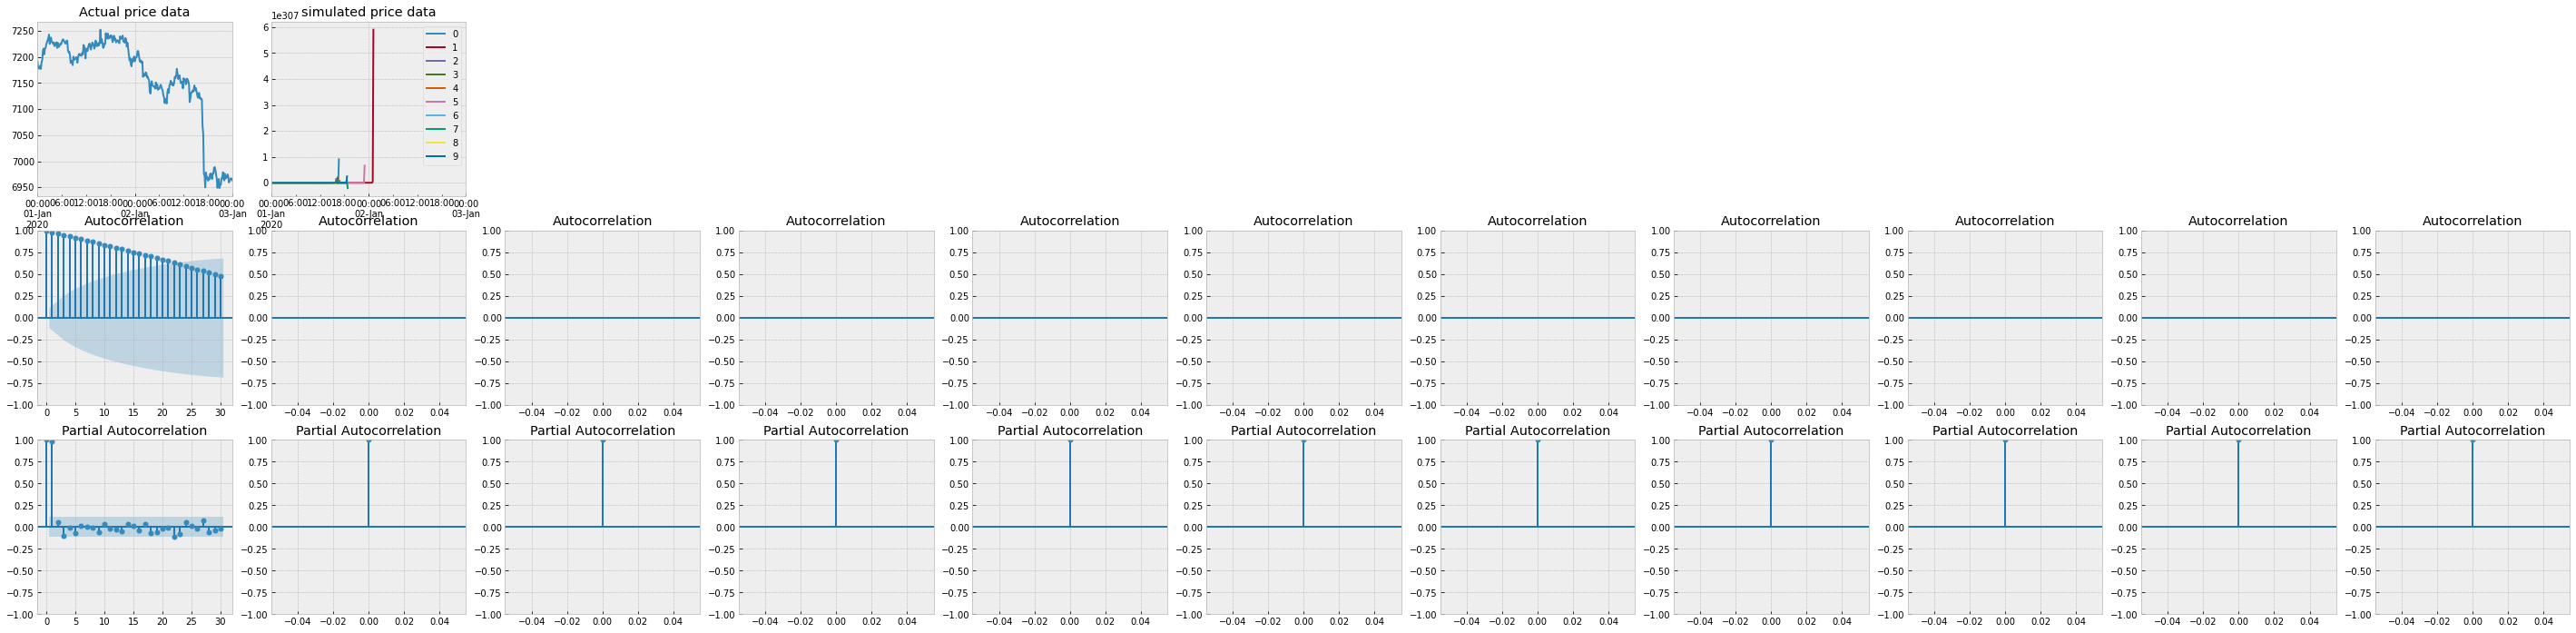

In [27]:
simulatedata.Evaluate_performance(dt['close'], simulated_price_data, lags=30)